In [19]:
# !pip install matplotlib

In [105]:
import pandas as pd 
import csv


ratings = pd.read_json("ratings.jsonl", lines=True)
targets = pd.read_csv("targets.csv")
content = pd.read_json("content.jsonl", lines=True)


# Drop: Ratings (imdbRating), Released (Year)
# Probably Drop: Rated, 
# Hard to use: Runtime

drop_cols = ["totalSeasons", "Season", "Episode", "seriesID"]  # Ratings, 
content = content.drop(drop_cols, axis=1)
content = content.replace("N/A", 0)

In [106]:
content.imdbRating = content.imdbRating.astype(float)
# content.imdbVotes = content.imdbVotes.to_numeric()
content.imdbVotes= content.imdbVotes.str.replace(',', '').astype(float)


In [9]:
content.head()

,ItemId,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
0,c9f0f895fb,Edison Kinetoscopic Record of a Sneeze,1894,0,09 Jan 1894,1 min,"Documentary, Short",William K.L. Dickson,0,Fred Ott,...,"[{'Source': 'Internet Movie Database', 'Value'...",0,5.5,1980.0,movie,0,0,0,0,True
1,d3d9446802,Leaving the Factory,1895,Not Rated,22 Mar 1895,1 min,"Documentary, Short",Louis Lumière,0,0,...,"[{'Source': 'Internet Movie Database', 'Value'...",0,6.9,6633.0,movie,0,0,0,0,True
2,c20ad4d76f,The Arrival of a Train,1896,Not Rated,25 Jan 1896,1 min,"Documentary, Short","Auguste Lumière, Louis Lumière",0,"Madeleine Koehler, Marcel Koehler, Mrs. August...",...,"[{'Source': 'Internet Movie Database', 'Value'...",0,7.5,11407.0,movie,0,0,0,0,True
3,8e296a067a,The Oxford and Cambridge University Boat Race,1895,0,0,0,"Short, News, Sport",Birt Acres,0,0,...,"[{'Source': 'Internet Movie Database', 'Value'...",0,4.2,39.0,movie,0,0,0,0,True
4,54229abfcf,The House of the Devil,1896,Not Rated,24 Dec 1896,3 min,"Short, Horror",Georges Méliès,Georges Méliès,"Jehanne d'Alcy, Jules-Eugène Legris, Georges M...",...,"[{'Source': 'Internet Movie Database', 'Value'...",0,6.7,3268.0,movie,0,0,0,0,True


In [10]:
ratings.head()

,UserId,ItemId,Timestamp,Rating
0,c4ca4238a0,91766eac45,2013-10-05 22:00:50,8
1,c81e728d9d,5c739554f7,2013-08-17 16:26:38,9
2,c81e728d9d,48f6d7ce7c,2013-08-17 13:28:27,8
3,c81e728d9d,e9318d627a,2013-06-15 15:38:09,1
4,a87ff679a2,17e6357973,2014-01-31 23:27:59,8


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659720 entries, 0 to 659719
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   UserId     659720 non-null  object        
 1   ItemId     659720 non-null  object        
 2   Timestamp  659720 non-null  datetime64[ns]
 3   Rating     659720 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 20.1+ MB


<Axes: ylabel='Frequency'>

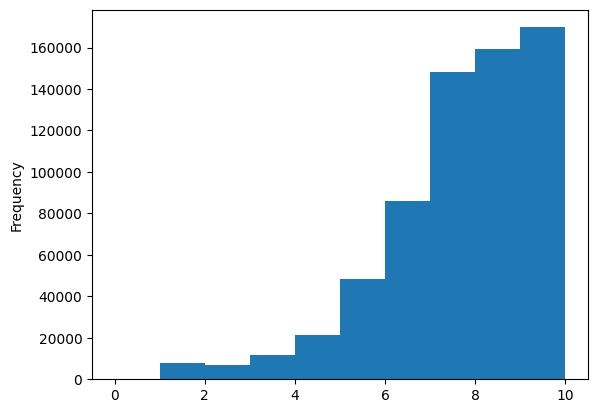

In [12]:
ratings.Rating.plot.hist()

In [13]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38012 entries, 0 to 38011
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ItemId      38012 non-null  object 
 1   Title       38012 non-null  object 
 2   Year        38012 non-null  object 
 3   Rated       38012 non-null  object 
 4   Released    38012 non-null  object 
 5   Runtime     38012 non-null  object 
 6   Genre       38012 non-null  object 
 7   Director    38012 non-null  object 
 8   Writer      38012 non-null  object 
 9   Actors      38012 non-null  object 
 10  Plot        38012 non-null  object 
 11  Language    38012 non-null  object 
 12  Country     38012 non-null  object 
 13  Awards      38012 non-null  object 
 14  Poster      38012 non-null  object 
 15  Ratings     38012 non-null  object 
 16  Metascore   38012 non-null  object 
 17  imdbRating  38012 non-null  float64
 18  imdbVotes   37734 non-null  float64
 19  Type        38012 non-nul

In [133]:
content.Country.unique().shape, content.Language.unique().shape

((3401,), (3161,))

In [123]:
# content.Genre = content.Genre.apply(lambda x: x.split(", ") if type(x) == str else [x])
# pd.DataFrame(content.Genre.to_list())

In [122]:
# content.Actors = content.Actors.apply(lambda x: x.split(", ") if type(x) == str else [x])
# pd.DataFrame(content.Actors.to_list())

In [14]:
users = targets.UserId.unique()

In [15]:
# rank movies by imdbVotes

# with open("output.csv", "w", newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows([["UserId", "ItemId"]])

#     result = []
#     print(len(users))
#     # for user in users[:5]:
#     for user in users:
#         items = targets.loc[targets.UserId == user].ItemId.to_numpy()
#         movies = content.loc[content.ItemId.isin(items)]
#         rank = movies.sort_values(by="imdbVotes", ascending=False).ItemId.to_numpy()
        
#         writer.writerows(list(zip([user] * 100, rank)))

In [71]:
content.iloc[0]

ItemId                                               c9f0f895fb
Title                    Edison Kinetoscopic Record of a Sneeze
Year                                                       1894
Rated                                                         0
Released                                            09 Jan 1894
Runtime                                                   1 min
Genre                                        Documentary, Short
Director                                   William K.L. Dickson
Writer                                                        0
Actors                                                 Fred Ott
Plot          A man (Edison's assistant) takes a pinch of sn...
Language                                                   None
Country                                           United States
Awards                                                    1 win
Poster        https://m.media-amazon.com/images/M/MV5BNGQ5Mj...
Ratings                                 

In [53]:
content["Ratings"] = content["Ratings"].map(lambda x: (x[0]["Value"].split("/")[0]) if len(x) > 0 else 0)

<Axes: ylabel='Frequency'>

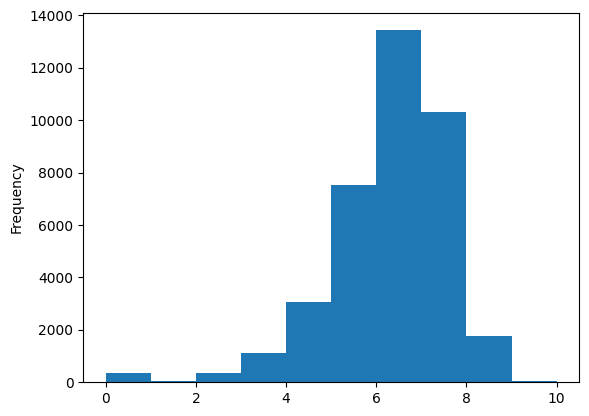

In [69]:
content.Ratings.map(lambda x: str(x).split("0%")[0]).astype(float).plot.hist()

<Axes: ylabel='Frequency'>

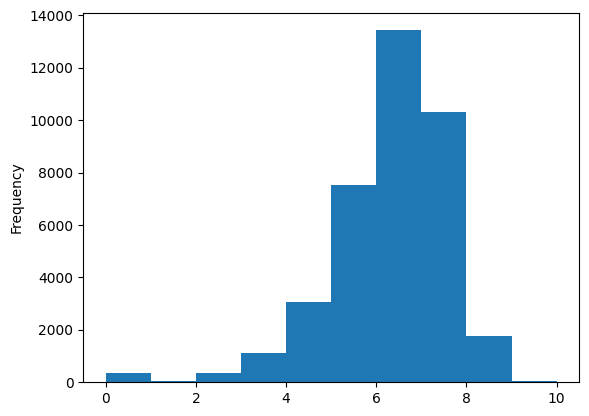

In [70]:
content.imdbRating.plot.hist()

In [2]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Input text
text = "This is an example sentence."

# Tokenize the text
tokens = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))

# Convert tokens to tensor
input_ids = torch.tensor(tokenizer.encode(tokens)).unsqueeze(0)

# Forward pass through BERT
outputs = model(input_ids)

# Extract features from BERT
features = outputs.last_hidden_state

In [4]:
features.shape


torch.Size([1, 8, 768])

In [5]:
features

tensor([[[-0.3774, -0.3350, -0.3206,  ..., -0.5255,  0.2590,  0.6877],
         [-0.8629, -0.6322, -0.4241,  ..., -0.5824,  0.7432,  0.1259],
         [-0.2213, -0.9393,  0.3523,  ..., -0.3219,  0.4667,  0.5915],
         ...,
         [-0.0471, -0.1261,  0.0237,  ..., -0.2642,  0.1113, -0.0666],
         [ 0.7917,  0.0632, -0.6609,  ...,  0.3360, -0.7243, -0.2557],
         [-0.1416, -0.3367, -0.3314,  ..., -0.2132, -0.4376,  0.4454]]],
       grad_fn=<NativeLayerNormBackward0>)